In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("summer.csv")

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.keys()

Index(['Year', 'City', 'Sport', 'Discipline', 'Athlete', 'Country', 'Gender',
       'Event', 'Medal'],
      dtype='object')

In [5]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [6]:
df.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

## **1. In how many cities Summer Olympics is held so far?**

In [7]:
df['City'].unique()

array(['Athens', 'Paris', 'St Louis', 'London', 'Stockholm', 'Antwerp',
       'Amsterdam', 'Los Angeles', 'Berlin', 'Helsinki',
       'Melbourne / Stockholm', 'Rome', 'Tokyo', 'Mexico', 'Munich',
       'Montreal', 'Moscow', 'Seoul', 'Barcelona', 'Atlanta', 'Sydney',
       'Beijing'], dtype=object)

In [8]:
df['City']

print("number of cities the olympics held:") 
len(df['City'].unique())

number of cities the olympics held:


22

## **2. Which sport is having most number of Gold Medals so far? (Top 5)**

Text(0.5, 1.0, 'sport having most number of Gold Medals')

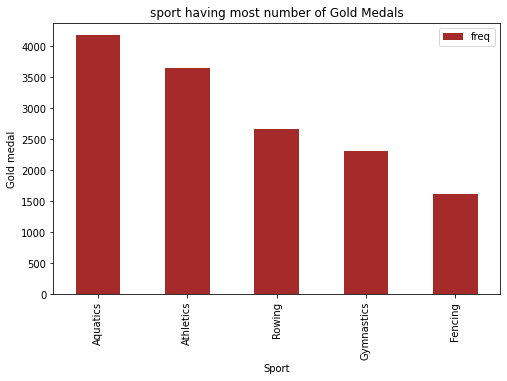

In [9]:
df['Medal']='Gold'
data = []
df[df['Medal']=='Gold']
for Sport in df['Sport'].unique():
    data.append([ Sport, len(df[df['Sport']  == Sport])])

data=pd.DataFrame(data,columns = ['Sport','freq']).sort_values(by='freq', ascending=False).head().plot(x = 'Sport',ylabel='Gold medal' ,kind = 'bar', figsize = (8,5),color='brown')
plt.title('sport having most number of Gold Medals')

In [10]:
df[df['Medal'] == 'Gold']
print(len(df[df['Medal'] == 'Gold']))

31165


## **3. Which sport is having most number of medals so far? (Top 5)**

In [11]:
df['Sport'].unique()

array(['Aquatics', 'Athletics', 'Cycling', 'Fencing', 'Gymnastics',
       'Shooting', 'Tennis', 'Weightlifting', 'Wrestling', 'Archery',
       'Basque Pelota', 'Cricket', 'Croquet', 'Equestrian', 'Football',
       'Golf', 'Polo', 'Rowing', 'Rugby', 'Sailing', 'Tug of War',
       'Boxing', 'Lacrosse', 'Roque', 'Hockey', 'Jeu de paume', 'Rackets',
       'Skating', 'Water Motorsports', 'Modern Pentathlon', 'Ice Hockey',
       'Basketball', 'Canoe / Kayak', 'Handball', 'Judo', 'Volleyball',
       'Table Tennis', 'Badminton', 'Baseball', 'Softball', 'Taekwondo',
       'Triathlon', 'Canoe'], dtype=object)

In [12]:
df.groupby('Sport').count()['Medal'].sort_values(ascending=False).head()

Sport
Aquatics      4170
Athletics     3638
Rowing        2667
Gymnastics    2307
Fencing       1613
Name: Medal, dtype: int64

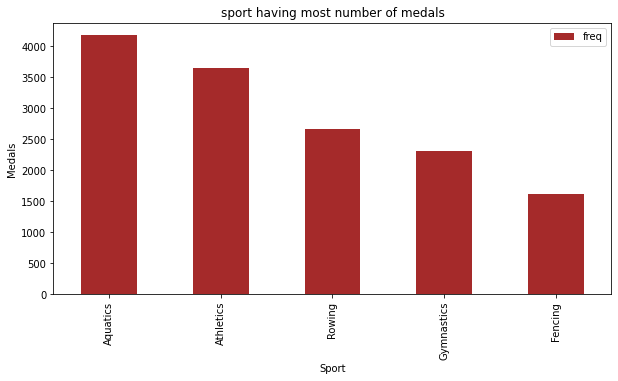

In [13]:
data = []

for Sport in df['Sport'].unique():
    data.append([ Sport, len(df[df['Sport']  == Sport])])

data=pd.DataFrame(data,columns = ['Sport','freq']).sort_values(by='freq', ascending=False).head().plot(x = 'Sport', ylabel = 'Medals', kind = 'bar', figsize = (10,5),color='brown',title='sport having most number of medals')

## **4. Which player has won most number of medals? (Top 5)**

In [14]:
df.groupby('Athlete').count()['Medal'].sort_values(ascending=False)

Athlete
PHELPS, Michael         22
LATYNINA, Larisa        18
ANDRIANOV, Nikolay      15
MANGIAROTTI, Edoardo    13
SHAKHLIN, Boris         13
                        ..
NAGY, Erno               1
NAGY, Ilona              1
NAGY, Jozsef             1
NAGY, Laszlo             1
AABYE, Edgar             1
Name: Medal, Length: 22762, dtype: int64

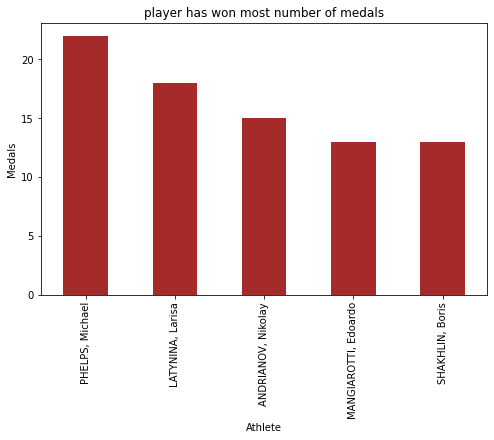

In [15]:
plt.figure(figsize=(8,5))
df.groupby('Athlete').count()['Medal'].sort_values(ascending=False).head().plot.bar(ylabel='Medals',color='brown')
plt.title('player has won most number of medals')
plt.show()

## **5. Which player has won most number Gold Medals of medals? (Top 5)**

In [17]:
gd=df[df["Medal"]=='Gold']

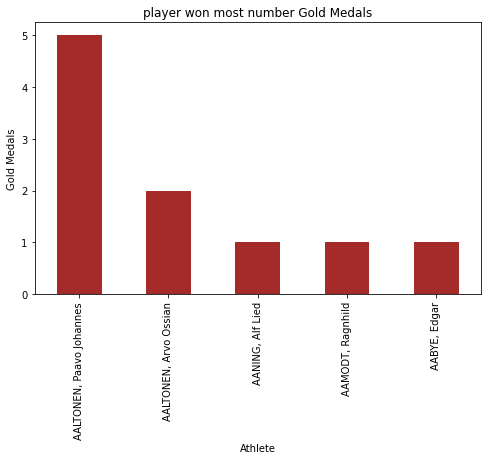

In [18]:
gd.groupby('Athlete').count()['Medal'].head().sort_values(ascending=False).plot(kind="bar",ylabel='Gold Medals',title='player won most number Gold Medals',figsize=(8,5),color='brown')

## **6. In which year India won first Gold Medal in Summer Olympics?**

In [19]:
data=df.loc[df['Country']=='IND'].head()
data

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
241,1900,Paris,Athletics,Athletics,"PRITCHARD, Norman",IND,Men,200M,Gold
244,1900,Paris,Athletics,Athletics,"PRITCHARD, Norman",IND,Men,200M Hurdles,Gold
5512,1928,Amsterdam,Hockey,Hockey,"ALLEN, Richard James",IND,Men,Hockey,Gold
5513,1928,Amsterdam,Hockey,Hockey,"CHAND, Dyan",IND,Men,Hockey,Gold
5514,1928,Amsterdam,Hockey,Hockey,"GATELEY, Maurice A.",IND,Men,Hockey,Gold


In [20]:
df_Gold=df[df['Medal']=='Gold']

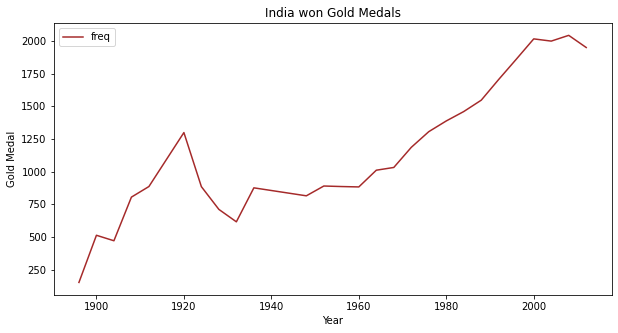

In [21]:
data=[]

for Year in df_Gold['Year'].unique():
  data.append([Year,len(df[df['Year']== Year])])

pd.DataFrame(data,columns=['Year','freq']).sort_values(by='Year',ascending=True).plot(x='Year',ylabel='Gold Medal',title='India won Gold Medals',figsize=(10,5),color='brown')

## **7. Which event is most popular in terms on number of players? (Top 5)**

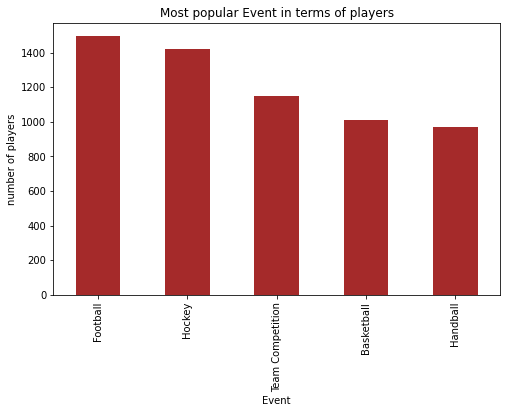

In [22]:
df.groupby('Event').count()['Athlete'].sort_values(ascending=False).head().plot.bar(ylabel='number of players',title='Most popular Event in terms of players',figsize=(8,5),color='brown')

## **8. Which sport is having most female Gold Medalists? (Top 5)**

In [23]:
df_female=df[df['Gender']== 'Women']

In [24]:
len(df[df['Gender']== 'Women'])

8419

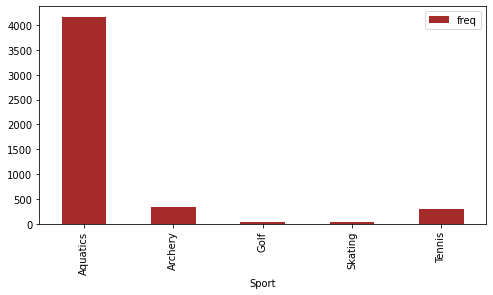

In [26]:
data=[]

for Gender in df_female['Sport'].unique():
  data.append([Gender,len(df[df['Sport']== Gender])])
  
pd.DataFrame(data,columns=['Sport','freq']).head().sort_values(by='Sport',ascending=True).plot.bar(x='Sport',y='freq',figsize=(8,4),color='brown')